In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import math

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/Scientific-Computing-at-Temple-Physics/Phys-3511-Fall2020/master/Module06/Data/Zee_Run2011A.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

In [38]:
#df.iloc[0:5,:]

In [60]:
import math
      
minv = (2*df.pt1*df.pt2*(np.cosh(df.eta1-df.eta2)- np.cos(df.phi1-df.phi2)))**0.5
#minv = (2*df['pt1']*df['pt2']*(np.cosh(df['eta1']-df['eta2'])- np.cos(df['phi1']-df['phi2'])))**0.5
df['minv']=minv
print(df)


          Run       Event      pt1      eta1      phi1  Q1 type1  \
0      163286   109060857  37.5667  2.289180  2.052600  -1    EE   
1      163286   109275715  36.2901 -0.837253 -1.585920   1    EB   
2      163286   109075352  25.9705 -0.697420  1.635990  -1    EB   
3      163286   109169766  41.0075  1.461920 -0.532464   1    EB   
4      163286   108947653  39.8985 -0.592666 -2.394720   1    EB   
...       ...         ...      ...       ...       ...  ..   ...   
18880  165993  1245864355  67.9728  0.591181  2.824340  -1    EB   
18881  165993  1245110568  42.8005 -2.291330  0.779165   1    EE   
18882  165993  1245123133  25.4359  0.137592  2.641270   1    EB   
18883  165993  1245207259  51.1762  0.778649  2.683120  -1    EB   
18884  165993  1245337805  28.6185  0.788226  1.231830  -1    EB   

       sigmaEtaEta1   HoverE1  isoTrack1  ...      eta2      phi2  Q2  type2  \
0          0.025125  0.008973    0.00000  ...  1.470640 -1.163050   1     EB   
1          0.007829  0.

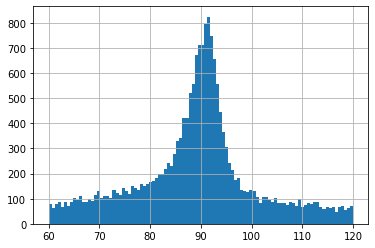

In [85]:
df['minv'].hist(bins = 100)

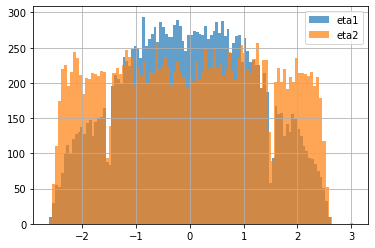

In [61]:
df['eta1'].hist(bins = 100, alpha = 0.7, label = 'eta1')
df['eta2'].hist(bins = 100, alpha = 0.7, label = 'eta2')
plt.legend()

In [63]:
endcap = df.loc[(df['type1'] == 'EE') & (df['type2'] == 'EE')]
print(endcap)

          Run       Event      pt1     eta1      phi1  Q1 type1  sigmaEtaEta1  \
18     163286   110668790  47.5727 -2.21799 -0.815233   1    EE      0.047381   
34     163286   111543719  30.2060 -2.21116 -0.568794   1    EE      0.028541   
41     163286   111928032  28.0401  2.33037 -2.839090  -1    EE      0.022362   
54     163297   107872385  34.8294  1.58033  0.952320   1    EE      0.020969   
69     163297   108833939  28.8562  1.89139  2.649820   1    EE      0.016848   
...       ...         ...      ...      ...       ...  ..   ...           ...   
18861  165993  1244645288  43.7571 -2.29965  2.999580  -1    EE      0.021766   
18863  165993  1244250002  27.8002 -1.53904  2.186070   1    EE      0.008698   
18872  165993  1244204126  51.8952 -1.98757  0.947703   1    EE      0.017641   
18875  165993  1245278225  30.5801  1.74794 -3.088930   1    EE      0.014878   
18881  165993  1245110568  42.8005 -2.29133  0.779165   1    EE      0.023484   

        HoverE1  isoTrack1 

In [64]:
barrel = df.loc[(df['type1'] == 'EB') & (df['type2'] == 'EB')]
print(barrel)

          Run       Event      pt1      eta1      phi1  Q1 type1  \
1      163286   109275715  36.2901 -0.837253 -1.585920   1    EB   
3      163286   109169766  41.0075  1.461920 -0.532464   1    EB   
8      163286   110268001  32.3642 -0.534036 -2.671810  -1    EB   
9      163286   110085994  31.4123 -0.216362  1.295420  -1    EB   
10     163286   110297282  27.4283  0.555189 -1.477450  -1    EB   
...       ...         ...      ...       ...       ...  ..   ...   
18877  165993  1245482967  47.4890 -0.577628 -2.085860  -1    EB   
18878  165993  1245947586  26.2686  1.378270  0.130022   1    EB   
18879  165993  1245752052  39.0030  0.527312 -1.577130   1    EB   
18880  165993  1245864355  67.9728  0.591181  2.824340  -1    EB   
18883  165993  1245207259  51.1762  0.778649  2.683120  -1    EB   

       sigmaEtaEta1   HoverE1  isoTrack1  ...      eta2      phi2  Q2  type2  \
1          0.007829  0.043751   0.000000  ... -0.489570  1.049600  -1     EB   
3          0.008753  0.

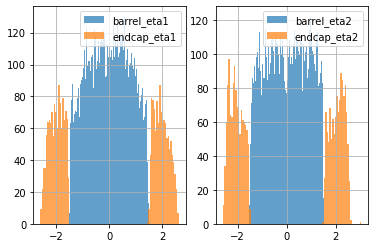

In [59]:
hist1 = plt.subplot(1, 2, 1)
barrel['eta1'].hist(bins = 100, alpha = 0.7, label = 'barrel_eta1')
endcap['eta1'].hist(bins = 100, alpha = 0.7, label = 'endcap_eta1')
plt.legend()
hist2 = plt.subplot(1, 2, 2)
barrel['eta2'].hist(bins = 100, alpha = 0.7, label = 'barrel_eta2')
endcap['eta2'].hist(bins = 100, alpha = 0.7, label = 'endcap_eta2')
plt.legend()

In [ ]:
#The histograms plotted above explain why the eta distributions are different and that this difference could be attributed to the tow different detectors
#The rough ranges ranges covered are from -2 to 2

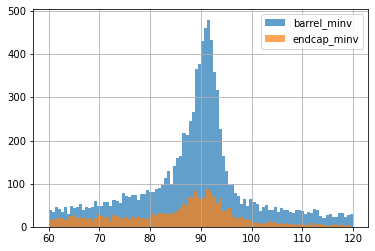

In [65]:
barrel['minv'].hist(bins = 100, alpha = 0.7, label = 'barrel_minv')
endcap['minv'].hist(bins = 100, alpha = 0.7, label = 'endcap_minv')
plt.legend()

In [77]:
std1 = barrel["minv"]
std1.std()

11.489115344078318

In [78]:
std2 = endcap["minv"]
std2.std()

12.229202324653295

In [ ]:
#The barrel detector has a better resolution as it has a narrower peak
#Histograms plotted support this conclusion

In [80]:
df2 = df.copy()
df2.drop(['Run'],axis=1,inplace=True)
df2.drop(['Event'],axis=1,inplace=True)
df2.drop(['Q1'],axis=1,inplace=True)
df2.drop(['type1'],axis=1,inplace=True)
df2.drop(['sigmaEtaEta1'],axis=1,inplace=True)
df2.drop(['HoverE1'],axis=1,inplace=True)
df2.drop(['isoTrack1'],axis=1,inplace=True)
df2.drop(['isoEcal1'],axis=1,inplace=True)
df2.drop(['isoHcal1'],axis=1,inplace=True)
df2.drop(['Q2'],axis=1,inplace=True)
df2.drop(['type2'],axis=1,inplace=True)
df2.drop(['sigmaEtaEta2','HoverE2','isoTrack2','isoEcal2','isoHcal2'],axis=1,inplace=True)
df2

,pt1,eta1,phi1,pt2,eta2,phi2,minv
0,37.5667,2.289180,2.052600,45.4315,1.470640,-1.163050,89.589562
1,36.2901,-0.837253,-1.585920,60.5754,-0.489570,1.049600,92.252290
2,25.9705,-0.697420,1.635990,45.2954,-2.040090,3.118750,67.859158
3,41.0075,1.461920,-0.532464,45.9013,1.156060,2.478580,87.604923
4,39.8985,-0.592666,-2.394720,34.8931,-2.244440,0.610610,101.426755
...,...,...,...,...,...,...,...
18880,67.9728,0.591181,2.824340,32.7795,0.566588,0.203395,91.232354
18881,42.8005,-2.291330,0.779165,49.8503,-1.640510,-2.741140,95.750631
18882,25.4359,0.137592,2.641270,50.9959,1.518880,-0.962316,88.378684
18883,51.1762,0.778649,2.683120,30.0143,-0.386661,-0.451479,92.069605


In [81]:
df2.corr()

,pt1,eta1,phi1,pt2,eta2,phi2,minv
pt1,1.000000,-0.005495,-0.000376,-0.068503,-0.009661,-0.000184,0.279797
eta1,-0.005495,1.000000,0.015935,0.009975,0.665429,-0.022004,0.010426
phi1,-0.000376,0.015935,1.000000,0.000893,0.007323,-0.460515,-0.000727
pt2,-0.068503,0.009975,0.000893,1.000000,0.010027,-0.000399,0.342749
eta2,-0.009661,0.665429,0.007323,0.010027,1.000000,-0.023955,0.002616
phi2,-0.000184,-0.022004,-0.460515,-0.000399,-0.023955,1.000000,-0.015139
minv,0.279797,0.010426,-0.000727,0.342749,0.002616,-0.015139,1.000000


In [ ]:
#eta1 and eta2 have a strong correlation